In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

from themis_ml import meta_estimators as estimators
from themis_ml import metrics as metrics

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
#import pydotplus

# print all outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Populating the interactive namespace from numpy and matplotlib


## Reading and Merging the files

In [2]:
charge = pd.read_csv("df_charge.csv")

In [3]:
len(charge)

148086

In [4]:
charge.head(2)

,Unnamed: 0,id,case_type,case_number,filing_date,offense_date,charge_number,charge_degree,charge,date_charge_filed,filing_type,filing_agency,name,days_since_compas,statute,person_id
0,1,1,NaN,13005832CF10A,1800-01-01 00:00:00.000000,2013-04-23 00:00:00.000000,1,(F3),Driving While License Revoked,2013-04-23 00:00:00,No Information/ Transfer to Misdemeanor,Fort Lauderdale PD,aajah herrington,1,322.34(5),533
1,2,2,NaN,13005832CF10A,1800-01-01 00:00:00.000000,2013-04-23 00:00:00.000000,2,(M2),Petit Theft,2013-04-23 00:00:00,Transfer to County Court,Fort Lauderdale PD,aajah herrington,1,812.014(3)(a),533


In [5]:
compas = pd.read_csv("df_compas.csv")

In [6]:
len(compas)

37578

In [7]:
compas.head(2)

,Unnamed: 0,id,first,last,compas_person_id,compas_case_id,compas_assessment_id,agency_text,scale_set,assessment_reason,...,marital_status,screening_date,rec_supervision_level,rec_supervision_level_text,score_text,scale_id,type_of_assessment,raw_score,decile_score,person_id
0,1,1,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,...,Single,2013-08-14 00:00:00.000000,1,Low,Low,7,Risk of Violence,-4.31,1,1
1,2,2,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,...,Single,2013-08-14 00:00:00.000000,1,Low,Low,8,Risk of Recidivism,-2.78,1,1


In [8]:
compas.score_text.value_counts()

Low       24577
Medium     8154
High       4826
Name: score_text, dtype: int64

In [9]:
people = pd.read_csv("df_people.csv")

In [10]:
len(people)

11757

In [11]:
people.head(2)

,Unnamed: 0,id,name,first,last,sex,race,dob,age,age_cat,...,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc
0,1,1,miguel hernandez,miguel,hernandez,Male,Other,1947-04-18 00:00:00.000000,69,Greater than 45,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2,2,michael ryan,michael,ryan,Male,Caucasian,1985-02-06 00:00:00.000000,31,25 - 45,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [12]:
compas['name'] = ""

In [13]:
compas['name'] = compas['first'].astype(str) + " " + compas['last'].astype(str)

In [14]:
compas.head(3)

,Unnamed: 0,id,first,last,compas_person_id,compas_case_id,compas_assessment_id,agency_text,scale_set,assessment_reason,...,screening_date,rec_supervision_level,rec_supervision_level_text,score_text,scale_id,type_of_assessment,raw_score,decile_score,person_id,name
0,1,1,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,...,2013-08-14 00:00:00.000000,1,Low,Low,7,Risk of Violence,-4.31,1,1,miguel hernandez
1,2,2,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,...,2013-08-14 00:00:00.000000,1,Low,Low,8,Risk of Recidivism,-2.78,1,1,miguel hernandez
2,3,3,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,...,2013-08-14 00:00:00.000000,1,Low,Low,18,Risk of Failure to Appear,13.00,1,1,miguel hernandez


In [15]:
merged_people_compas = people.merge(compas, on='name', how='left')

In [16]:
len(merged_people_compas)

38841

In [17]:
merged_people_compas.head(2)

,Unnamed: 0_x,id_x,name,first_x,last_x,sex,race,dob,age,age_cat,...,marital_status,screening_date,rec_supervision_level,rec_supervision_level_text,score_text_y,scale_id,type_of_assessment,raw_score,decile_score_y,person_id
0,1,1,miguel hernandez,miguel,hernandez,Male,Other,1947-04-18 00:00:00.000000,69,Greater than 45,...,Single,2013-08-14 00:00:00.000000,1,Low,Low,7,Risk of Violence,-4.31,1,1
1,1,1,miguel hernandez,miguel,hernandez,Male,Other,1947-04-18 00:00:00.000000,69,Greater than 45,...,Single,2013-08-14 00:00:00.000000,1,Low,Low,8,Risk of Recidivism,-2.78,1,1


In [18]:
if np.any(merged_people_compas["name"] == 'aaron aprile'):
...     print("yes")

yes


In [19]:
merged_people_compas[merged_people_compas['name'] == 'aaron aprile']['c_charge_desc']

14799    Grand Theft in the 3rd Degree
14800    Grand Theft in the 3rd Degree
14801    Grand Theft in the 3rd Degree
14802    Grand Theft in the 3rd Degree
14803    Grand Theft in the 3rd Degree
14804    Grand Theft in the 3rd Degree
Name: c_charge_desc, dtype: object

## Final merged file

In [20]:
ultimate_merged  = charge.merge(merged_people_compas, on='name', how='right')

In [21]:
ultimate_merged.score_text_y.unique()

array(['Medium', 'Low', 'High', nan], dtype=object)

In [22]:
nan0=ultimate_merged.score_text_y.isna().astype(int) 

In [23]:
nan0.value_counts()

0    548434
1       158
Name: score_text_y, dtype: int64

In [24]:
len(ultimate_merged)

548592

In [25]:
ultimate_merged.head(2)

,Unnamed: 0,id,case_type,case_number,filing_date,offense_date,charge_number,charge_degree,charge,date_charge_filed,...,marital_status,screening_date,rec_supervision_level,rec_supervision_level_text,score_text_y,scale_id,type_of_assessment,raw_score,decile_score_y,person_id_y
0,1.0,1.0,NaN,13005832CF10A,1800-01-01 00:00:00.000000,2013-04-23 00:00:00.000000,1.0,(F3),Driving While License Revoked,2013-04-23 00:00:00,...,Single,2013-04-24 00:00:00.000000,1,Low,Medium,7,Risk of Violence,-1.96,5,533
1,2.0,2.0,NaN,13005832CF10A,1800-01-01 00:00:00.000000,2013-04-23 00:00:00.000000,2.0,(M2),Petit Theft,2013-04-23 00:00:00,...,Single,2013-04-24 00:00:00.000000,1,Low,Medium,7,Risk of Violence,-1.96,5,533


## Cleaning 

In [26]:
ultimate_merged.columns.tolist()

['Unnamed: 0',
 'id',
 'case_type',
 'case_number',
 'filing_date',
 'offense_date',
 'charge_number',
 'charge_degree',
 'charge',
 'date_charge_filed',
 'filing_type',
 'filing_agency',
 'name',
 'days_since_compas',
 'statute',
 'person_id_x',
 'Unnamed: 0_x',
 'id_x',
 'first_x',
 'last_x',
 'sex',
 'race',
 'dob',
 'age',
 'age_cat',
 'juv_fel_count',
 'juv_misd_count',
 'juv_other_count',
 'compas_screening_date',
 'decile_score_x',
 'score_text_x',
 'violent_recid',
 'priors_count',
 'days_b_screening_arrest',
 'c_jail_in',
 'c_jail_out',
 'c_case_number',
 'c_days_from_compas',
 'c_arrest_date',
 'c_offense_date',
 'c_charge_degree',
 'c_charge_desc',
 'is_recid',
 'num_r_cases',
 'r_case_number',
 'r_charge_degree',
 'r_days_from_arrest',
 'r_offense_date',
 'r_charge_desc',
 'r_jail_in',
 'r_jail_out',
 'is_violent_recid',
 'num_vr_cases',
 'vr_case_number',
 'vr_charge_degree',
 'vr_offense_date',
 'vr_charge_desc',
 'Unnamed: 0_y',
 'id_y',
 'first_y',
 'last_y',
 'compas_p

In [27]:
ultimate_merged.columns.get_values()

AttributeError: 'Index' object has no attribute 'get_values'

In [ ]:
# Removing the rows for which score_text_y = Medium
#ultimate_merged=ultimate_merged[ultimate_merged.score_text_y.str.contains("Medium") == False]

In [28]:
len(ultimate_merged)

548592

In [29]:
ultimate_merged['num_r_cases'].isna().any()

True

In [30]:
ultimate_merged[ultimate_merged.num_r_cases.isna()].score_text_y.value_counts()

Low       160123
Medium     60891
High       39864
Name: score_text_y, dtype: int64

In [31]:
ultimate_merged.groupby('num_r_cases')[['decile_score_y', 'score_text_y']].size()

num_r_cases
1.0     157122
2.0      72084
3.0      28452
4.0      15789
5.0       5613
6.0       4026
7.0        957
8.0        906
9.0       1020
10.0       174
12.0       807
15.0       216
18.0        99
29.0       102
55.0       231
dtype: int64

In [32]:
ultimate_merged["num_r_cases"].mean()

1.9376316942398766

In [33]:
# Reason for padding with 2 (mean) is: since we don't have data from other counties or states, we can pad our data
# with the mean of our population to keep those rows w/o influencing the # of recidivism cases

ultimate_merged['num_r_cases'] = ultimate_merged['num_r_cases'].fillna(2)

In [34]:
ultimate_merged['num_r_cases']=ultimate_merged['num_r_cases'].astype(int)

In [35]:
ultimate_merged['num_r_cases'].unique()

array([ 1,  2,  4,  3,  6,  7,  5,  8, 12,  9, 10, 15, 18, 55, 29])

In [36]:
nan2=ultimate_merged.r_days_from_arrest.isna().astype(int) 

In [37]:
nan2.value_counts()

1    353226
0    195366
Name: r_days_from_arrest, dtype: int64

In [38]:
ultimate_merged['r_days_from_arrest'] = ultimate_merged['r_days_from_arrest'].fillna(0)

In [39]:
ultimate_merged['r_days_from_arrest']=ultimate_merged['r_days_from_arrest'].astype(int)

In [40]:
ultimate_merged['r_days_from_arrest'].unique()

array([  0,  78,   1, 281, 277,  51, 175, 253, 614,  83, 136,  89, 101,
        77,   6, 203, 273,  68,  98, 160, 305,  59,  76, 396, 131, 143,
        19, 162,  42, 113,  94, 194, 140, 862, 119, 135,   4,  -1,  85,
        73, 233, 407,  15,  32, 116,  47, 124, 168, 123,  27,   8, 457,
       191,  18, 271,  57, 440,   9,  50,  36, 721,  66,  52,  39, 272,
        97, 159, 825, 134,  43,  41,  56, 354,  14, 351,  13, 265,  34,
       132, 151, 395,  24,  12,  21,  86, 139, 216,  99, 509, 100,   3,
        74, 294,  44,  62,   7, 178, 106,  37, 161, 137,   5, 149,  87,
       173, 130,  54, 144, 264,  90, 445,  35,  81, 394, 280,  38, 157,
        67, 185,  91,  84,  22,  31, 105, 165,  71,  61, 245,  75, 404,
       166, 758,  49, 176, 155, 349,  26, 179, 163, 152, 153, 146, 118,
        53,  28, 347,  25, 417, 227, 222, 269, 438, 249, 111, 112, 200,
        55, 243,  23,  30,  48, 128, 523, 122,  11, 241,  92,  96, 308,
       115, 104, 228, 596,  40, 156, 102, 196, 183, 415,  63, 25

In [41]:
nan3=ultimate_merged.score_text_y.isna().astype(int)

In [42]:
nan3.value_counts()

0    548434
1       158
Name: score_text_y, dtype: int64

In [43]:
ultimate_merged.score_text_y = ultimate_merged.decile_score_y.apply(lambda r: 'Low' if r < 6 else 'High')

In [44]:
ultimate_merged.groupby('score_text_y')['score_text_y'].count()

score_text_y
High    206965
Low     341627
Name: score_text_y, dtype: int64

In [45]:
# score_text changing to 0 and 1 depending on the decile score
ultimate_merged['score_text_y']=ultimate_merged['score_text_y'].map(lambda x: 0 if x == 'High' else 1 )

In [46]:
ultimate_merged['score_text_y'].unique()

array([1, 0])

In [47]:
ultimate_merged=ultimate_merged.rename(columns = {'score_text_y':'reoffending_risk'})

In [48]:
ultimate_merged['sex'] = ultimate_merged["sex"].map(
    lambda x: {"Male": 1, "Female": 0}[x])

In [49]:
ultimate_merged['race']=ultimate_merged['race'].map(lambda x: 1 if x == 'African-American' else 0)

In [50]:
#Creating age_binary variable (<25=1, >=25=0)
ultimate_merged['age_binary']=ultimate_merged['age'].map(lambda x: 1 if x >= 25 else 0 )

In [51]:
ultimate_merged['age_binary'].unique()

array([0, 1])

## Creating the data, only with the columns we need

In [52]:
mydata = ultimate_merged[['sex', 'race', 'age','juv_misd_count', 'juv_other_count','juv_fel_count', 
       'priors_count','is_recid','num_r_cases','age_binary',
       'r_days_from_arrest','is_violent_recid',  
       'type_of_assessment', 'rec_supervision_level_text', 'marital_status','reoffending_risk']]

In [53]:
mydata.head(2)

,sex,race,age,juv_misd_count,juv_other_count,juv_fel_count,priors_count,is_recid,num_r_cases,age_binary,r_days_from_arrest,is_violent_recid,type_of_assessment,rec_supervision_level_text,marital_status,reoffending_risk
0,0,1,23,0,0,0,0,1,1,0,0,0,Risk of Violence,Low,Single,1
1,0,1,23,0,0,0,0,1,1,0,0,0,Risk of Violence,Low,Single,1


In [54]:
mydata['reoffending_risk'].value_counts()

1    341627
0    206965
Name: reoffending_risk, dtype: int64

In [55]:
mydata.sex.value_counts()

1    479202
0     69390
Name: sex, dtype: int64

In [56]:
mydata.race.value_counts()

1    327084
0    221508
Name: race, dtype: int64

In [57]:
mydata.age_binary.value_counts()

1    470304
0     78288
Name: age_binary, dtype: int64

In [58]:
mydata.type_of_assessment =  mydata["type_of_assessment"].str.replace(' ', '_')

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [59]:
mydata.marital_status =  mydata["marital_status"].str.replace(' ', '_')

In [60]:
mydata.rec_supervision_level_text =  mydata["rec_supervision_level_text"].str.replace(' ', '_')

### Copy of the final data

In [61]:
mydata2 = mydata.copy()

In [62]:
# Creating dummy columns
mydata2 = pd.get_dummies(mydata2, columns=['rec_supervision_level_text','marital_status',
                        'type_of_assessment'],
               dummy_na=True)

In [63]:
mydata2.dtypes

sex                                                              int64
race                                                             int64
age                                                              int64
juv_misd_count                                                   int64
juv_other_count                                                  int64
juv_fel_count                                                    int64
priors_count                                                     int64
is_recid                                                         int64
num_r_cases                                                      int64
age_binary                                                       int64
r_days_from_arrest                                               int64
is_violent_recid                                                 int64
reoffending_risk                                                 int64
rec_supervision_level_text_High                                  uint8
rec_su

In [64]:
#### Dropping some the nan' and 'age' columns ####

mydata2.drop(labels=['age','type_of_assessment_nan', 'marital_status_nan','rec_supervision_level_text_nan'], axis=1, inplace=True)

In [65]:
mydata2.head(2)

,sex,race,juv_misd_count,juv_other_count,juv_fel_count,priors_count,is_recid,num_r_cases,age_binary,r_days_from_arrest,...,marital_status_Divorced,marital_status_Married,marital_status_Separated,marital_status_Significant_Other,marital_status_Single,marital_status_Unknown,marital_status_Widowed,type_of_assessment_Risk_of_Failure_to_Appear,type_of_assessment_Risk_of_Recidivism,type_of_assessment_Risk_of_Violence
0,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1


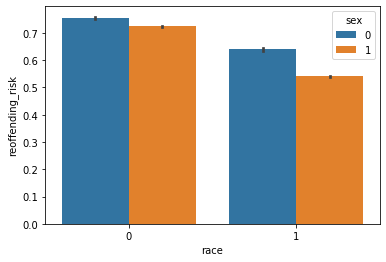

In [66]:
sns.barplot(x="race", y="reoffending_risk", hue="sex", data=mydata2)

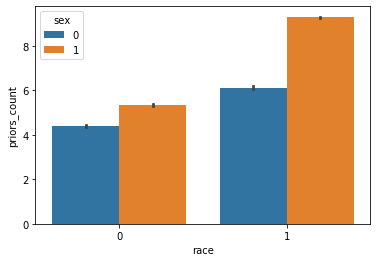

In [67]:
sns.barplot(x='race', y='priors_count', hue='sex', data=mydata2)

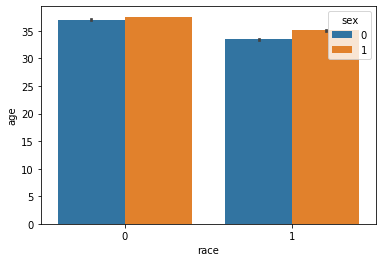

In [68]:
sns.barplot(x='race', y = 'age', hue='sex', data=mydata)

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


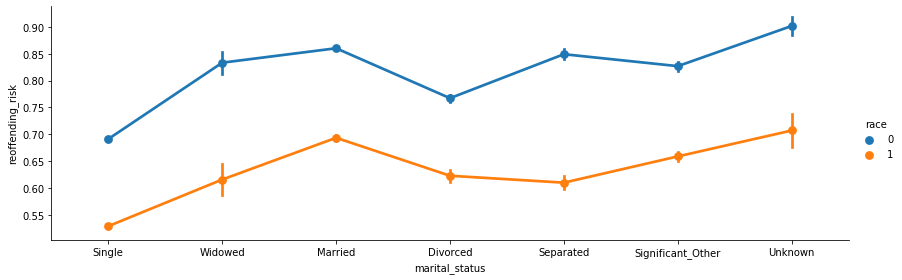

In [69]:
sns.factorplot(x='marital_status', y='reoffending_risk', hue='race', data= mydata, size=4, aspect=3)

## Themis-ml

In [70]:
from themis_ml.metrics import mean_difference

In [71]:
mean_difference(mydata2.reoffending_risk,mydata2.sex)

(0.0827457953574724, 0.07889331180813813, 0.08659827890680666)

In [72]:
mean_difference(mydata2.reoffending_risk,mydata2.race)

(0.17690359841441416, 0.17433174076927235, 0.17947545605955598)

In [73]:
mean_difference(mydata2.reoffending_risk, mydata2.age_binary)

(-0.0676833009314205, -0.07134593285565995, -0.06402066900718105)

In [74]:
print("Mean difference scores:")
print("protected class = sex: %0.03f, 95%% CI [%0.03f - %0.03f]" %
      mean_difference(mydata2.reoffending_risk, mydata2.sex))

print("protected class = race: %0.03f, 95%% CI [%0.03f - %0.03f]" %
      mean_difference(mydata2.reoffending_risk, mydata2.race))

print("protected class = age: %0.03f, 95%% CI [%0.03f - %0.03f]" %
      mean_difference(mydata2.reoffending_risk, mydata2.age_binary))

Mean difference scores:
protected class = sex: 0.083, 95% CI [0.079 - 0.087]
protected class = race: 0.177, 95% CI [0.174 - 0.179]
protected class = age: -0.068, 95% CI [-0.071 - -0.064]


In [75]:
# Taking a random 50,000 sample from the data
mydata_small2=mydata2.sample(50000)

In [76]:
len(mydata_small2)

50000

In [77]:
mydata_small2.head(2)

,sex,race,juv_misd_count,juv_other_count,juv_fel_count,priors_count,is_recid,num_r_cases,age_binary,r_days_from_arrest,...,marital_status_Divorced,marital_status_Married,marital_status_Separated,marital_status_Significant_Other,marital_status_Single,marital_status_Unknown,marital_status_Widowed,type_of_assessment_Risk_of_Failure_to_Appear,type_of_assessment_Risk_of_Recidivism,type_of_assessment_Risk_of_Violence
430407,1,0,0,0,0,4,1,1,1,0,...,0,1,0,0,0,0,0,0,1,0
324882,1,1,0,0,0,15,0,2,1,0,...,0,0,0,1,0,0,0,0,1,0


In [78]:
sex=mydata_small2['sex']
race=mydata_small2['race']

In [79]:
from sklearn.model_selection import train_test_split

# load model-ready data
training_data = mydata_small2
training_data.head()

# define feature sets:
# 1. including protected attributes
   
features = ['sex', 'race', 'age_binary','juv_fel_count',
       'juv_misd_count', 'juv_other_count', 
       'priors_count','is_recid',
       'num_r_cases','r_days_from_arrest','is_violent_recid',
       'marital_status_Single', 'marital_status_Widowed', 'marital_status_Married',  'marital_status_Divorced','marital_status_Separated',
       'marital_status_Significant_Other', 'marital_status_Unknown','rec_supervision_level_text_Low','rec_supervision_level_text_Medium',
       'rec_supervision_level_text_High', 'rec_supervision_level_text_Medium_with_Override_Consideration','type_of_assessment_Risk_of_Violence',
       'type_of_assessment_Risk_of_Recidivism','type_of_assessment_Risk_of_Failure_to_Appear', 'reoffending_risk'
]
    
    
# 3. removing variables related to sex and race
features_no_race = [f for f in features if f != "race"]
features_no_sex = [f for f in features if f != "sex"]

X = training_data[features].values
X_no_sex = training_data[features_no_sex].values
X_no_race = training_data[features_no_race].values
y = training_data["reoffending_risk"].values
s_sex = sex.values
s_race = race.values


,sex,race,juv_misd_count,juv_other_count,juv_fel_count,priors_count,is_recid,num_r_cases,age_binary,r_days_from_arrest,...,marital_status_Divorced,marital_status_Married,marital_status_Separated,marital_status_Significant_Other,marital_status_Single,marital_status_Unknown,marital_status_Widowed,type_of_assessment_Risk_of_Failure_to_Appear,type_of_assessment_Risk_of_Recidivism,type_of_assessment_Risk_of_Violence
430407,1,0,0,0,0,4,1,1,1,0,...,0,1,0,0,0,0,0,0,1,0
324882,1,1,0,0,0,15,0,2,1,0,...,0,0,0,1,0,0,0,0,1,0
451975,1,1,0,0,0,13,0,2,1,0,...,0,0,1,0,0,0,0,1,0,0
93260,1,1,0,0,0,9,0,2,1,0,...,0,0,0,1,0,0,0,0,0,1
120410,1,1,0,0,0,6,1,2,1,0,...,0,0,0,0,1,0,0,0,1,0


In [80]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.base import clone

from themis_ml.postprocessing.reject_option_classification import \
    SingleROClassifier
from themis_ml.linear_model import LinearACFClassifier

In [81]:
METRICS_COLUMNS = [
    "mean_diff_sex", "mean_diff_race", "auc_sex", "auc_race"]


def run_experiment_iteration(
        X, X_no_sex, X_no_race, y, s_sex, s_race, train, test):
    """Run the experiment on a particular set of train and test indices."""
    
    # store our metrics here. This will be a list of lists, where the inner
    # list is contains the following metadata:
    # - "name"
    # - fairness metric with respect to sex
    # - fairness metric with respect to foreign status
    # - utility metric with respect to sex
    # - utility metric with respect to foreign status
    metrics = []

    # define our model.
    logistic_clf = LogisticRegression(penalty="l2", C=0.001, class_weight="balanced")
    rf_clf = RandomForestClassifier(max_depth=4, random_state=10)
    baseline_clf = logistic_clf
    baseline_rf_clf = rf_clf
    rpa_clf = logistic_clf
    rpa_rf_clf = rf_clf
    roc_clf = SingleROClassifier(estimator=logistic_clf)
    roc_rf_clf = SingleROClassifier(estimator = baseline_rf_clf)
    acf_clf = LinearACFClassifier(
        target_estimator=logistic_clf,
        binary_residual_type="absolute")
    acf_rf_clf = LinearACFClassifier(
        target_estimator=rf_clf,
        binary_residual_type="absolute")
    
    # train baseline model
    baseline_clf.fit(X[train], y[train])
    baseline_preds = baseline_clf.predict(X[test])
    baseline_auc = roc_auc_score(y[test], baseline_preds)
    metrics.append([
        "B",
        mean_difference(baseline_preds, s_sex[test])[0],
        mean_difference(baseline_preds, s_race[test])[0],
        baseline_auc, baseline_auc  # repeated because the two AUC values are the
                                    # same in the baseline case
    ])
    baseline_rf_clf.fit(X[train], y[train])
    baseline_rf_preds = baseline_rf_clf.predict(X[test])
    baseline_rf_auc = roc_auc_score(y[test], baseline_rf_preds)
    metrics.append([
        "B_RF",
        mean_difference(baseline_rf_preds, s_sex[test])[0],
        mean_difference(baseline_rf_preds, s_race[test])[0],
        baseline_rf_auc, baseline_rf_auc  # repeated because the two AUC values are the
                                    # same in the baseline case
    ])
    # train "remove protected attributes" model. Here we have to train two
    # seperate ones for sex and foreign status.

    # model trained with no explicitly sex-related variables
    rpa_preds_no_sex = rpa_clf.fit(
        X_no_sex[train], y[train]).predict(X_no_sex[test])
    # model trained with no explicitly foreign-related variables
    rpa_preds_no_race = rpa_clf.fit(
        X_no_race[train], y[train]).predict(X_no_race[test])
    metrics.append([
        "RPA",
        mean_difference(rpa_preds_no_sex, s_sex[test])[0],
        mean_difference(rpa_preds_no_race, s_race[test])[0],
        roc_auc_score(y[test], rpa_preds_no_sex),
        roc_auc_score(y[test], rpa_preds_no_race),
    ])
    
    rpa_rf_preds_no_sex = rpa_rf_clf.fit(
        X_no_sex[train], y[train]).predict(X_no_sex[test])
    # model trained with no explicitly foreign-related variables
    rpa_rf_preds_no_race = rpa_rf_clf.fit(
        X_no_race[train], y[train]).predict(X_no_race[test])
    metrics.append([
        "RPA_RF",
        mean_difference(rpa_rf_preds_no_sex, s_sex[test])[0],
        mean_difference(rpa_rf_preds_no_race, s_race[test])[0],
        roc_auc_score(y[test], rpa_rf_preds_no_sex),
        roc_auc_score(y[test], rpa_rf_preds_no_race),
    ])
    
    # train reject-option classification model.
    roc_clf.fit(X[train], y[train])
    roc_preds_sex = roc_clf.predict(X[test], s_sex[test])
    roc_preds_race = roc_clf.predict(X[test], s_race[test])
    metrics.append([
        "ROC",
        mean_difference(roc_preds_sex, s_sex[test])[0],
        mean_difference(roc_preds_race, s_race[test])[0],
        roc_auc_score(y[test], roc_preds_sex),
        roc_auc_score(y[test], roc_preds_race),
    ])

    roc_rf_clf.fit(X[train], y[train])
    roc_rf_preds_sex = roc_rf_clf.predict(X[test], s_sex[test])
    roc_rf_preds_race = roc_rf_clf.predict(X[test], s_race[test])
    metrics.append([
        "ROC_RF",
        mean_difference(roc_rf_preds_sex, s_sex[test])[0],
        mean_difference(roc_rf_preds_race, s_race[test])[0],
        roc_auc_score(y[test], roc_rf_preds_sex),
        roc_auc_score(y[test], roc_rf_preds_race),
    ])

    # train additive counterfactually fair model.
    acf_preds_sex = acf_clf.fit(
        X[train], y[train], s_sex[train]).predict(X[test], s_sex[test])
    acf_preds_race = acf_clf.fit(
        X[train], y[train], s_race[train]).predict(X[test], s_race[test])
    metrics.append([
        "ACF",
        mean_difference(acf_preds_sex, s_sex[test])[0],
        mean_difference(acf_preds_race, s_race[test])[0],
        roc_auc_score(y[test], acf_preds_sex),
        roc_auc_score(y[test], acf_preds_race),
    ])

    acf_rf_preds_sex = acf_rf_clf.fit(
        X[train], y[train], s_sex[train]).predict(X[test], s_sex[test])
    acf_rf_preds_race = acf_rf_clf.fit(
        X[train], y[train], s_race[train]).predict(X[test], s_race[test])
    metrics.append([
        "ACF_RF",
        mean_difference(acf_rf_preds_sex, s_sex[test])[0],
        mean_difference(acf_rf_preds_race, s_race[test])[0],
        roc_auc_score(y[test], acf_rf_preds_sex),
        roc_auc_score(y[test], acf_rf_preds_race),
    ])
    
    # convert metrics list of lists into dataframe
    return pd.DataFrame(
        metrics, columns=["condition"] + METRICS_COLUMNS)

In [82]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

N_SPLITS = 5
N_REPEATS = 5


# add these two binary variables so that we can stratify the observations
# by protected class
groups = np.add(s_sex, s_race)


# do 5-fold, 10x repeating cross validation so that we quantify the
# uncertainty around our metrics estimates.
cv = RepeatedStratifiedKFold(
    n_splits=N_SPLITS, n_repeats=N_REPEATS, random_state=41)

metrics = []
print("Running cross-validation experiment...")
for i, (train_idx, test_idx) in enumerate(cv.split(X, y, groups=groups)):
    metrics.append(
        run_experiment_iteration(
            X, X_no_sex, X_no_race, y, s_sex, s_race, train_idx, test_idx)
        .assign(rep_fold=i))

# concatenate metrics from all cv-folds
metrics = pd.concat(metrics)

# compute mean point estimate for each metric and each condition
group_df = metrics.groupby("condition")
mean_metrics = (
    group_df
    [METRICS_COLUMNS].mean()
)
# compute standard error of the mean
stderr_metrics = (
    group_df
    [METRICS_COLUMNS].std()
) / np.sqrt(N_REPEATS * N_SPLITS)

Running cross-validation experiment...


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

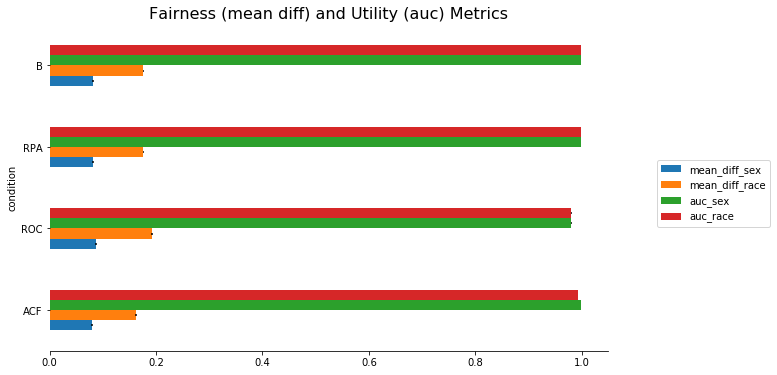

In [83]:
# plot vertical bar chart
ax = mean_metrics.loc[reversed(["B", "RPA", "ROC", "ACF"])].plot(
    kind="barh", figsize=(10, 6),
    xerr=stderr_metrics.loc[reversed(["B", "RPA", "ROC", "ACF"])],
    legend=False);
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 0.6))
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', which='both', left='off')
ax.set_title(
    "Fairness (mean diff) and Utility (auc) Metrics", fontsize=16);

In [84]:
mean_metrics.loc[["B", "RPA", "ROC", "ACF"]].rename(
    columns=lambda x: "mean(%s)" % x)

,mean(mean_diff_sex),mean(mean_diff_race),mean(auc_sex),mean(auc_race)
condition,,,,
B,0.081772,0.176121,0.998964,0.998964
RPA,0.081652,0.176035,0.998990,0.998966
ROC,0.087289,0.192434,0.980749,0.980749
ACF,0.080115,0.162656,0.998753,0.993815


# Themis-ml 2

In [85]:
####  Taking equal (80,000) random samples from each race #### 1

size = 80000       # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
mydata_sampled1=mydata.groupby('race', as_index=False).apply(fn)

In [86]:
####  Taking equal (80.000) random samples from each race #### 2

size = 80000       # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
mydata_sampled=mydata2.groupby('race', as_index=False).apply(fn)

In [87]:
len(mydata_sampled1)

160000

In [88]:
mydata_sampled1.groupby('race')['race'].count()

race
0    80000
1    80000
Name: race, dtype: int64

In [89]:
race_mean=mydata2.groupby('race').agg({'reoffending_risk':'mean','race' :'count'})

In [90]:
race_mean

,reoffending_risk,race
race,,
0,0.728208,221508
1,0.551305,327084


In [91]:
mydata_sampled1.groupby(['race','reoffending_risk'])['reoffending_risk'].count()

race  reoffending_risk
0     0                   21858
      1                   58142
1     0                   35798
      1                   44202
Name: reoffending_risk, dtype: int64

In [92]:
mydata_sampled1.groupby('reoffending_risk')['reoffending_risk'].count()

reoffending_risk
0     57656
1    102344
Name: reoffending_risk, dtype: int64

In [93]:
mydata_sampled.groupby(['reoffending_risk'])['reoffending_risk'].count()

reoffending_risk
0     57447
1    102553
Name: reoffending_risk, dtype: int64

In [94]:
mydata_sampled1.groupby(['race','reoffending_risk'])['reoffending_risk'].count()

race  reoffending_risk
0     0                   21858
      1                   58142
1     0                   35798
      1                   44202
Name: reoffending_risk, dtype: int64

In [95]:
print (21738/58262)
print (35823/44177)

0.3731076859702722
0.8108970731376055


In [96]:
mydata_sampled1.to_csv("~/crime111.csv", encoding='utf-8', index=False)

## Promoting and demoting the disadvantaged and advantaged groups 

In [97]:
#### Shuffling the data, so we take random observations for promoting and demoting

mydata_sampled_shuf1 = mydata_sampled1.sample(frac=1).reset_index(drop=True)
mydata_sampled_shuf1.head(5)

,sex,race,age,juv_misd_count,juv_other_count,juv_fel_count,priors_count,is_recid,num_r_cases,age_binary,r_days_from_arrest,is_violent_recid,type_of_assessment,rec_supervision_level_text,marital_status,reoffending_risk
0,1,0,25,0,0,0,2,1,2,1,1,0,Risk_of_Failure_to_Appear,Low,Single,1
1,1,0,51,0,0,0,3,0,2,1,0,0,Risk_of_Violence,Low,Single,1
2,0,0,22,0,0,0,1,0,2,0,0,0,Risk_of_Recidivism,Low,Significant_Other,1
3,1,0,27,0,1,0,18,1,1,1,0,0,Risk_of_Violence,High,Single,0
4,1,0,28,0,0,0,1,1,1,1,0,0,Risk_of_Failure_to_Appear,Medium,Single,1


In [98]:
mydata2.groupby(['race'])['race'].count()

race
0    221508
1    327084
Name: race, dtype: int64

In [99]:
print (mydata2.groupby(['race','reoffending_risk'])['reoffending_risk'].count())
print (mydata2.groupby(['race'])['race'].count())

race  reoffending_risk
0     0                    60204
      1                   161304
1     0                   146761
      1                   180323
Name: reoffending_risk, dtype: int64
race
0    221508
1    327084
Name: race, dtype: int64


In [100]:
print("Proportions:")

print("\nblack/nonblack = ") 
print(327084/221508)

print("\nblack_risky/black_nonrisky = ") 
print (146761/180323)

print("\nnonblack_risky/nonblack_nonrisky = ") 
print (221508/161304)

print("\nblack_riskiness/nonblack_riskiness = ") 
print(0.8139/0.3732)

Proportions:

black/nonblack = 
1.4766238691153366

black_risky/black_nonrisky = 
0.8138784292630447

nonblack_risky/nonblack_nonrisky = 
1.3732331498288946

black_riskiness/nonblack_riskiness = 
2.1808681672025725


## This means that even though the proportion of black in the data is almost 1.5 times bigger, the proportions of the the black being risky versus nonblack being risky is more than twice bigger. Which showes the bias in the data towards the black people.

In [101]:
mydata_sampled.groupby(['race','reoffending_risk'])['reoffending_risk'].count()

race  reoffending_risk
0     0                   21494
      1                   58506
1     0                   35953
      1                   44047
Name: reoffending_risk, dtype: int64

In [102]:
print (28171/51829)
print (13332/66668)

0.5435374018406683
0.1999760004799904


In [103]:
mydata_sampled_shuf1 .groupby(['reoffending_risk'])['reoffending_risk'].count()

reoffending_risk
0     57656
1    102344
Name: reoffending_risk, dtype: int64

In [104]:
              
def promote(df, x, y):
    count = 0
    for index, row in df.iterrows():
        if row[x]==1 and row[y]==0:
            count = count + 1
            df.at[index, y] = 1
            if count==2000:
                break
            
promote(mydata_sampled_shuf1 , 'race', 'reoffending_risk')

print("**********")
mydata_sampled_shuf1 .groupby(['reoffending_risk'])['reoffending_risk'].count()

**********


reoffending_risk
0     55656
1    104344
Name: reoffending_risk, dtype: int64

In [105]:
def demote(df, x, y):
    count = 0
    for index, row in df.iterrows():
        if row[x]==0 and row[y]==1:
            count = count + 1
            df.at[index, y] = 0
            if count==12000:
                break
            
demote(mydata_sampled_shuf1 , 'race', 'reoffending_risk')

print("**********")
mydata_sampled_shuf1 .groupby(['reoffending_risk'])['reoffending_risk'].count()

**********


reoffending_risk
0    67656
1    92344
Name: reoffending_risk, dtype: int64

In [106]:
mydata_sampled_shuf1 .groupby(['race','reoffending_risk'])['reoffending_risk'].count()

race  reoffending_risk
0     0                   33858
      1                   46142
1     0                   33798
      1                   46202
Name: reoffending_risk, dtype: int64

In [107]:
print("nonblack_risky/nonblack_nonrisky = ") 
print (33613/46387)
print("\nblack_risky/black_nonrisky = ") 
print (33593/46407)

nonblack_risky/nonblack_nonrisky = 
0.7246211222971953

black_risky/black_nonrisky = 
0.7238778632533885


In [108]:
mydata_sampled_shuf1.to_csv("~/crime222.csv", encoding='utf-8', index=False)

In [109]:
mydata_sampled_shuf1.head(2)

,sex,race,age,juv_misd_count,juv_other_count,juv_fel_count,priors_count,is_recid,num_r_cases,age_binary,r_days_from_arrest,is_violent_recid,type_of_assessment,rec_supervision_level_text,marital_status,reoffending_risk
0,1,0,25,0,0,0,2,1,2,1,1,0,Risk_of_Failure_to_Appear,Low,Single,0
1,1,0,51,0,0,0,3,0,2,1,0,0,Risk_of_Violence,Low,Single,0
